In [0]:
# !pip install pydot
# !apt-get install graphviz
# !pip install scikit-image

In [2]:
# Code is based on https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
from random import randint
import skimage.io

Using TensorFlow backend.


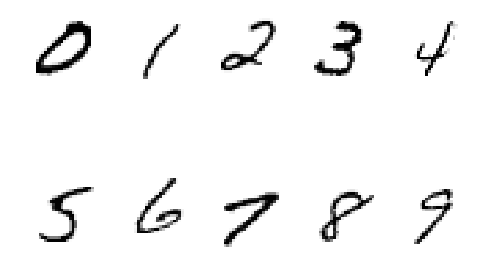

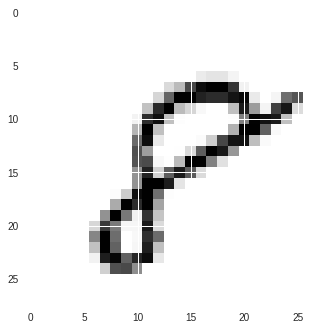

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [3]:
batch_size = 128  # сколько изображений задействовать для одного обновления весов в градиентном спуске
epochs = 20       # сколько сделать полных проходов по датасету
num_classes = 10  # 0, ..., 9


# Обучающая выборка - 60К изображений, тестовая - 10К, размер каждого изображения - 28 х 28 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
fig, ax = plt.subplots(2, 5)
d = dict()
while len(d) < 10:
  for img, label in zip(x_train, y_train):
    d[label] = img
for i in range(2):
  for j in range(5):
    nx = 5*i + j
    ax[i, j].imshow(d[nx])
    ax[i, j].axis('off')
plt.show()


# Увеличенный пример
ax = plt.gca()
plt.imshow(d[8])
plt.show()


# Меняем форму данных, проводим нормализацию и затем проводим one-hot encoding
x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# Послойно формируем модель
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()


# Назначаем модели функцию потерь, оптимизатор и метрики качества
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [5]:
# Обучаем модель
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 93us/step - loss: 0.2451 - acc: 0.9242 - val_loss: 0.1161 - val_acc: 0.9647
Epoch 2/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.1041 - acc: 0.9683 - val_loss: 0.1043 - val_acc: 0.9661
Epoch 3/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.0763 - acc: 0.9772 - val_loss: 0.0760 - val_acc: 0.9765
Epoch 4/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.0611 - acc: 0.9817 - val_loss: 0.0753 - val_acc: 0.9813
Epoch 5/50
60000/60000 [==============================] - 3s 53us/step - loss: 0.0489 - acc: 0.9854 - val_loss: 0.0731 - val_acc: 0.9807
Epoch 6/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.0435 - acc: 0.9872 - val_loss: 0.0840 - val_acc: 0.9782
Epoch 7/50
60000/60000 [==============================] - 3s 53us/step - loss: 0.0378 - acc: 0.9884 - val_loss: 0.0746 - val_acc

In [0]:
# Вычисляем метрику качества и функцию потерь для тестовых данных
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08974071440300894
Test accuracy: 0.9812
